In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import seaborn as sns

In [2]:
claim=pd.read_csv('claims.csv')
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust=pd.read_csv('cust_demographics.csv')
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [ ]:
# 1. Import claims_data.csv and cust_data.csv which is provided to you and
# combine the two datasets appropriately to create a 360-degree view of
# the data. Use the same for the subsequent questions.

In [4]:
df=pd.merge(cust,claim,how='inner',left_on='CUST_ID',right_on='customer_id')
df.drop('CUST_ID',axis=1,inplace=True)
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [ ]:
# 2. Perform a data audit for the datatypes and find out if there are any
# mismatch within the current datatypes of the columns and their
# business significance.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 135.6+ KB


In [11]:
#columns that should be numeric- claim_amount
#columns that should be datetime- DateOfBirth,claim_date
#columns that should be object- claim_id, customer_id

In [6]:
df.DateOfBirth=df.DateOfBirth.astype('datetime64[ns]')
df.claim_date=df.claim_date.astype('datetime64[ns]')
df.claim_id=df.claim_id.astype('object')
df.customer_id=df.customer_id.astype('object')
#df.total_policy_claims=df.total_policy_claims.astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null object
customer_id            1085 non-null object
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: datetime64[ns](2), float64(1), object(12)
memory usage: 135.6+ KB


In [9]:
# 3. Convert the column claim_amount to numeric. Use the appropriate
# modules/attributes to remove the $ sign.

In [8]:
df.claim_amount=df.claim_amount.str.replace('$','')
df.claim_amount=df.claim_amount.astype('float64')

In [12]:
# 4. Of all the injury claims, some of them have gone unreported with the
# police. Create an alert flag (1,0) for all such claims.

In [9]:
df['flag']=0
df.loc[df.claim_type.isin(['Material and injury','Injury only']) & (df.police_report == 'Unknown'),'flag']=1
#df['Flag'] = np.where(df.claim_type.isin(['Material and injury','Injury only']) & (df.police_report == 'Unknown'),1,0)

In [ ]:
# 5. One customer can claim for insurance more than once and in each claim,
# multiple categories of claims can be involved. However, customer ID
# should remain unique.
# Retain the most recent observation and delete any duplicated records in
# the data based on the customer ID column.

In [10]:
df=df.sort_values(by='claim_date',ascending=True)
df.drop_duplicates(subset='customer_id',keep='last',inplace=True)

In [23]:
# 6. Check for missing values and impute the missing values with an
# appropriate value. (mean for continuous and mode for categorical)

In [11]:
df.isna().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [12]:
df['claim_amount']=df.claim_amount.fillna(df.claim_amount.mean())
df['total_policy_claims']=df['total_policy_claims'].fillna(df.total_policy_claims.mode()[0])
#df['total_policy_claims']=df['total_policy_claims'].replace(np.NaN,df.total_policy_claims.mode()[0])

In [13]:
df.isna().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

In [ ]:
# 7. Calculate the age of customers in years. Based on the age, categorize the
# customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60

In [14]:
curr_year = dt.today().year
dob_year = df['DateOfBirth'].dt.year          
x = dob_year-100                                               
v = curr_year - x
y = curr_year - dob_year
df['Age'] = (np.where(dob_year > curr_year,v,y))
df['Age_grp']=pd.cut(df['Age'], bins=[0,18,30,60,100], labels=['Children','Youth','Adult','Senior'])

In [169]:
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
177,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,35,Adult
181,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0,26,Youth
312,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,0,45,Adult
905,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0,27,Youth
120,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0,55,Adult


In [152]:
# 8. What is the average amount claimed by the customers from various
# segments?

In [15]:
df.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64

In [ ]:
# 9. What is the total claim amount based on incident cause for all the claims
# that have been done at least 20 days prior to 1st of October, 2018.

In [16]:
from datetime import datetime, timedelta
from dateutil.parser import parse

In [17]:
given_date = parse('2018-10-1')- timedelta(days=20)
df.loc[df.claim_date < given_date].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

In [ ]:
# 10. How many adults from TX, DE and AK claimed insurance for driver
# related issues and causes?

In [18]:
df.loc[(df.Age_grp=="Adult") & (df.State.isin(['TX','DE','AK']))].groupby('incident_cause').size()

incident_cause
Driver error          17
Natural causes         9
Other causes          13
Other driver error    12
dtype: int64

In [ ]:
# 11. Draw a pie chart between the aggregated value of claim amount based
# on gender and segment. Represent the claim amount as a percentage on
# the pie chart.

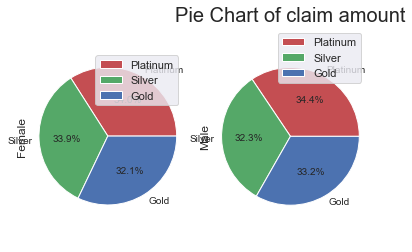

In [33]:
claim = pd.pivot_table(df, index =['Segment'],columns ='gender',values ='claim_amount')


claim.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots=True)

plt.title('Pie Chart of claim amount',fontsize=20)

plt.axis('equal')
plt.show()

In [ ]:
# 12. Among males and females, which gender had claimed the most for any
# type of driver related issues? E.g. This metric can be compared using a
# bar chart

In [20]:
df_gender=df.loc[df.incident_cause.isin(['Driver error','Other driver error'])].groupby('gender').size()
df_gender

gender
Female    221
Male      281
dtype: int64

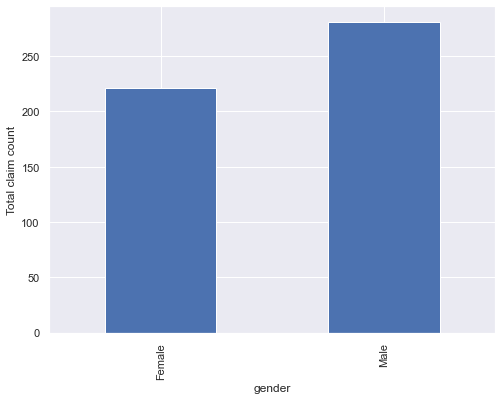

In [21]:
sns.set()
df_gender.plot.bar(figsize=(8,6))
plt.ylabel('Total claim count')
plt.show()

In [195]:
# 13. Which age group had the maximum fraudulent policy claims? Visualize
# it on a bar chart.

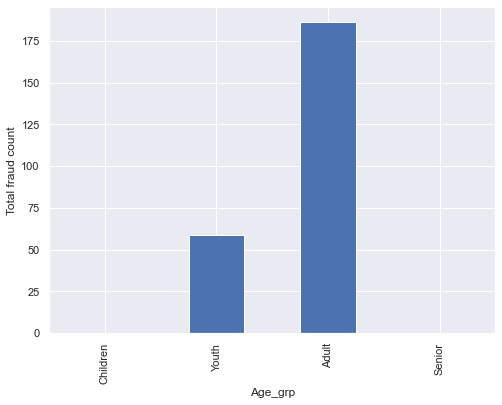

In [22]:
df_fraud=df.loc[df['fraudulent']=='Yes'].groupby('Age_grp').size()
sns.set()
df_fraud.plot.bar(figsize=(8,6))
plt.ylabel('Total fraud count')
plt.show()

In [ ]:
# 14. Visualize the monthly trend of the total amount that has been claimed
# by the customers. Ensure that on the “month” axis, the month is in a
# chronological order not alphabetical order.

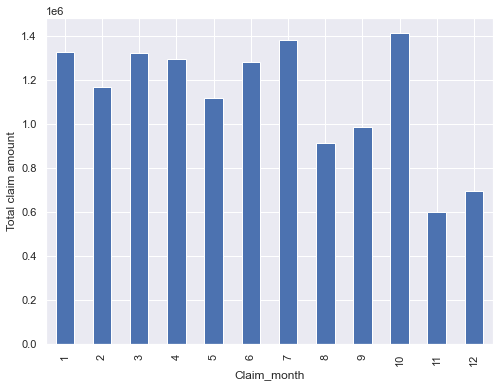

In [23]:
df['Claim_month'] = df['claim_date'].dt.month
df_month=df.groupby('Claim_month')['claim_amount'].sum()
sns.set()
df_month.plot.bar(figsize=(8,6))
plt.ylabel('Total claim amount')
plt.show()

In [205]:
# 15. What is the average claim amount for gender and age categories and
# suitably represent the above using a facetted bar chart, one facet that
# represents fraudulent claims and the other for non-fraudulent claims.

In [44]:
gen_amt = pd.pivot_table(data = df,
              index = 'gender',
              columns = 'fraudulent',
              values = 'claim_amount',
              aggfunc = 'mean')
age_amt = pd.pivot_table(data = df,
              index = 'Age_grp',
              columns = 'fraudulent',
              values = 'claim_amount',
              aggfunc = 'mean')

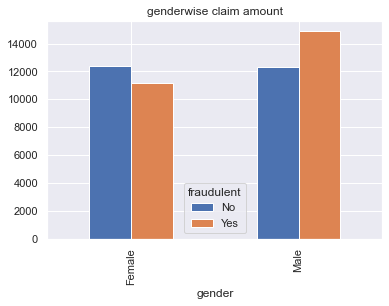

In [45]:
gen_amt.plot.bar(title = "genderwise claim amount")

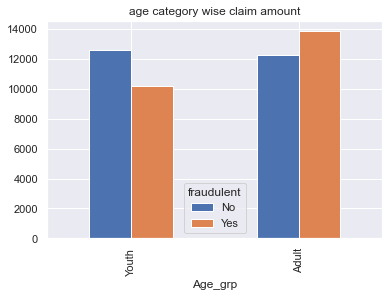

In [48]:
age_amt.plot.bar(title = "age category wise claim amount")

In [31]:
# Based on the conclusions from exploratory analysis as well as suitable
# statistical tests, answer the below questions. Please include a detailed
# write-up on the parameters taken into consideration, the Hypothesis
# testing steps, conclusion from the p-values and the business implications of
# the statements.
import scipy.stats as stats
import math

In [213]:
# 16. Is there any similarity in the amount claimed by males and females?

In [216]:
male_claim = df.claim_amount[df.gender=='Male']
female_claim = df.claim_amount[df.gender=='Female']

In [217]:
#two sample t-test independent
stats.ttest_ind(a= male_claim,
                b= female_claim,
                equal_var=True) 

Ttest_indResult(statistic=0.962509344663214, pvalue=0.33601006135365363)

In [218]:
#Null hypothesis- amount claimed by males and females is similiar
#as p value >0.05 we cannot reject null hypothesis, hence we can say the amount 
# claimed by males and females is similiar

In [219]:
# 17. Is there any relationship between age category and segment?

In [220]:
t=pd.crosstab(df.Age_grp,df.Segment, margins = True)
t

Segment,Gold,Platinum,Silver,All
Age_grp,,,,
Youth,88,101,88,277
Adult,283,260,258,801
All,371,361,346,1078


In [221]:
#Chi-square test
stats.chi2_contingency(observed= t)

(1.7559082572247031,
 0.9407239643787965,
 6,
 array([[  95.33116883,   92.76159555,   88.90723562,  277.        ],
        [ 275.66883117,  268.23840445,  257.09276438,  801.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [222]:
#Null hypothesis- There is no relationship between age category and segement, i.e they are independent
#as p value >0.05 we cannot reject null hypothesis, hence we can say  there is no relationship
# between age category and segment

In [ ]:
# 18. The current year has shown a significant rise in claim amounts as
# compared to 2016-17 fiscal average which was $10,000.

In [32]:
#one sample t-test
stats.ttest_1samp(a= df.claim_amount,               
                 popmean=10000 ) 

Ttest_1sampResult(statistic=6.146897188063232, pvalue=1.1110879097327724e-09)

In [ ]:
#Null hypothesis - Average claim amount in current is year is equal to $10000
#as p value <0.05 we are able to reject null hypothesis, hence we can say The current year has shown a 
#significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [240]:
# 19. Is there any difference between age groups and insurance claims?

In [241]:
df_youth = df['total_policy_claims'].loc[df['Age_grp']=="Youth"]
df_adult = df['total_policy_claims'].loc[df['Age_grp']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(df_youth,df_adult)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 1.391493039893233 and the p value is 0.23841386414374896
We fail to reject null hypothesis


In [242]:
#Null hypothesis- number of policy claims by different age group is similiar
#as p value >0.05 we cannot reject null hypothesis, hence we can say  there is no difference in the insurance 
# claims by different age groups

In [243]:
#can also be done two sample t-test independent
stats.ttest_ind(a= df_youth,
                b= df_adult,
                equal_var=True) 

Ttest_indResult(statistic=1.1796156322689315, pvalue=0.2384138641438129)

In [244]:
# 20. Is there any relationship between total number of policy claims and the
# claimed amount?

In [34]:
#Null hypothesis- There is no relationship between number of policy claims and claim-amount, i.e they are independent
#as p value >0.05 we cannot reject null hypothesis, hence we can say  there is no relationship
# between number of policy claims and claim-amount
#print(np.corrcoef(df.total_policy_claims,df.claim_amount)) 
print(stats.stats.pearsonr(df.total_policy_claims,df.claim_amount)) 

(-0.02240156677762887, 0.4624932766041524)
